<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/(%EC%A0%95%EB%A6%AC)_%EC%83%9D%EC%A1%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생존분석

Logrank

In [3]:
import pandas as pd
data = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice', 'Bob', 'Charlie', 'Dan', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan']
)

#Survival function 추정

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

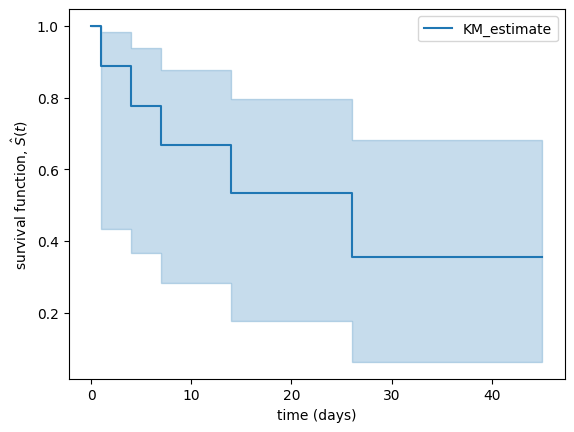

In [4]:
!pip install lifelines
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(data["time"], data["event"])

plot = kmf.plot_survival_function()
plot.set_xlabel('time (days)')
plot.set_ylabel('survival function, $\hat{S}(t)$')
plot

#Cumulative hazard function 추정

<Axes: xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

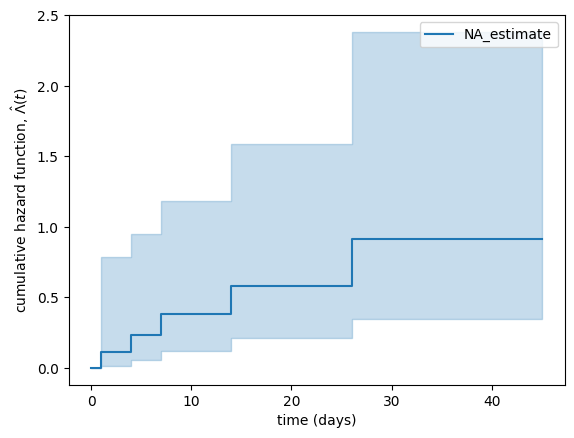

In [6]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"], data["event"])

plot = naf.plot_cumulative_hazard()
plot.set_xlabel('time (days)')
plot.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
plot

#이탈방지 평가

우리가 서비스 이탈에 관심을 가지는 이유는 결국 이탈을 방지해야 하기 때문이겠죠. 서비스에 신규 가입한 고객에게 특별한 프로모션을 진행했다고 가정해 봅시다. 다음과 같이 A/B 테스트 결과를 얻었습니다. (편의상 똑같은 데이터를 두 번 사용합시다)

In [8]:
data_A = pd.DataFrame(
    {
        'time': [2, 4, 9, 12, 19, 23, 26, 41, 48],
        'event': [True, True, False, False, False, True, True, False, False]
    },
    index = ['Alice_A', 'Bob_A', 'Charlie_A', 'Dan_A', 'Eve_A', 'Frank_A', 'Grace_A', 'Heidi_A', 'Ivan_A']
)

data_B = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice_B', 'Bob_B', 'Charlie_B', 'Dan_B', 'Eve_B', 'Frank_B', 'Grace_B', 'Heidi_B', 'Ivan_B']
)

<Axes: xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

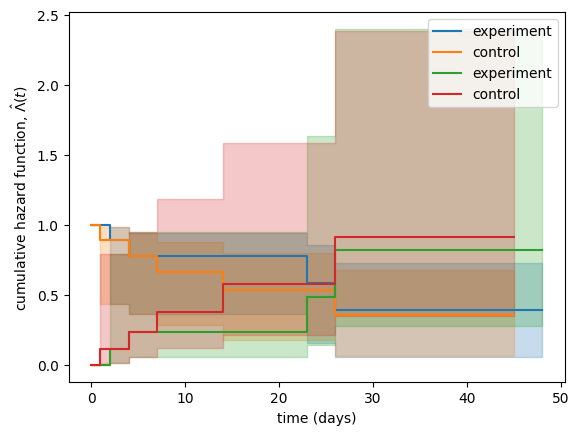

In [9]:
#두 그룹의 생존함수와 누적위험함수를 각각 추정해 봅시다.


kmf = KaplanMeierFitter()
kmf.fit(data_A["time"], data_A["event"], label="experiment")
ax_kmf = kmf.plot()
kmf.fit(data_B["time"], data_B["event"], label="control")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

naf = NelsonAalenFitter()
naf.fit(data_A["time"], data_A["event"], label="experiment")
ax_naf = naf.plot()
naf.fit(data_B["time"], data_B["event"], label="control")
ax_naf = naf.plot(ax=ax_naf)

ax_naf.set_xlabel('time (days)')
ax_naf.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
ax_naf

#유의성 검증
Logrank test는 생존함수 분포를 비교하고 유의한 차이가 있는지 알아보는 가설 검정 기법입니다. Mantel-Cox test라고도 합니다. 파이썬에서는 다음과 같이 Logrank test를 실행할 수 있습니다.


In [10]:

from lifelines.statistics import logrank_test
logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"]).p_value

0.6791912509835747

앞서 얻은 A/B 테스트 결과를 Logrank test로 검증해 보면 p-value가 0.6792로 계산됩니다.

즉, 프로모션은 유의한 성과를 얻지 못했습니다.